In [1]:
# libs for data processing
import pandas as pd
import numpy as np
import openpyxl

# libs for visualising data
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

# Other libs
import calendar
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler 

# Don't print warnings
import warnings
warnings.filterwarnings('ignore')

### In this project, we will analyse Journal data

#### Data fields and explanation
<ul>
  <li><code>Date_time</code></li>
  <li><code>days_since_last_entry</code> -- Number of days since the last entry. (Not including the days of both entry)</li>
  <li><code>word_count</code> -- word count of the entry</li>
  <li><code>TB_senti</code> -- sentiment score from textblob</li>
  <li><code>vader_senti</code> -- compound sentiment score from Vader</li>
  <li><code>tags</code> -- Tags of the entry (list)</li>
  <li><code>journal</code> -- text of the journal</li>
</ul>

In [34]:
# read the dataframe
df = pd.read_excel('journal_xlsx.xlsx')

# set index to date time 
df.index = df['date_time']

# create new columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['time'] = df['date_time'].dt.time

# move columns' positions
year = df.pop('year')
df.insert(1, 'year', year, False)
month = df.pop('month')
df.insert(2, 'month', month, False)
day = df.pop('day')
df.insert(3, 'day', day, False)
time = df.pop('time')
df.insert(4, 'time', time, False)

# drop date_time col
#df.drop(columns=['date_time'], inplace=True)

In [35]:
df.head(2)

,date_time,year,month,day,time,days_since_last_entry,word_count,TB_senti,vader_senti,tags,journal
date_time,,,,,,,,,,,
2013-08-27 16:53:00,2013-08-27 16:53:00,2013,8,27,16:53:00,NaN,106,0.334615,0.9655,NaN,Back from school. Had prelim math (p1) and chi...
2014-01-06 14:23:00,2014-01-06 14:23:00,2014,1,6,14:23:00,131.0,89,0.424825,0.9842,NaN,Still enjoying after O levels holiday! just ba...


#### <span style='color:LightGreen'>**Ex1: Get an overview by answering the following questions**</span>

<ul style='color:LightGreen'>
  <li>What is the total number of entries written?</li>
  <li>What is the total number of words written?</li>
  <li>What is the average number of words written/entry?</li>
  <li>What is the maximum number of days since last entry</li>
  <li>What is the average number of days since last entry</li>
  <li>What is the mean Textblob sentiment score</li>
  <li>What is the mean Vader sentiment score</li>
</ul>

In [36]:
print(f"Total number of entries written:          {len(df)}\n")
print(f"Total number of words written:            {df['word_count'].sum()}")
print(f"Average number of words written:          {round(df['word_count'].mean())}\n")
print(f"Maximum number of days since last entry:  {round(df['days_since_last_entry'].max())}")
print(f"Average number of days since last entry:  {round(df['days_since_last_entry'].mean(), 1)}\n")
print(f"Average Textblob sentiment score:         {round(df['TB_senti'].mean(), 3)}")
print(f"Average Vader sentiment score:            {round(df['vader_senti'].mean(), 3)}")

Total number of entries written:          1127

Total number of words written:            412082
Average number of words written:          366

Maximum number of days since last entry:  131
Average number of days since last entry:  2.7

Average Textblob sentiment score:         0.14
Average Vader sentiment score:            0.659


#### <span style='color:LightGreen'> **Ex2: Visualise metrics as a time series**</span>

<ul style='color:LightGreen'>
  <li>Word count</li>
  <li>Days since last entry</li>
  <li>Number of entries</li>
  <li>Textblob sentiment</li>
  <li>Textblob sentiment</li>
  <li>Vader sentiment</li>
</ul>

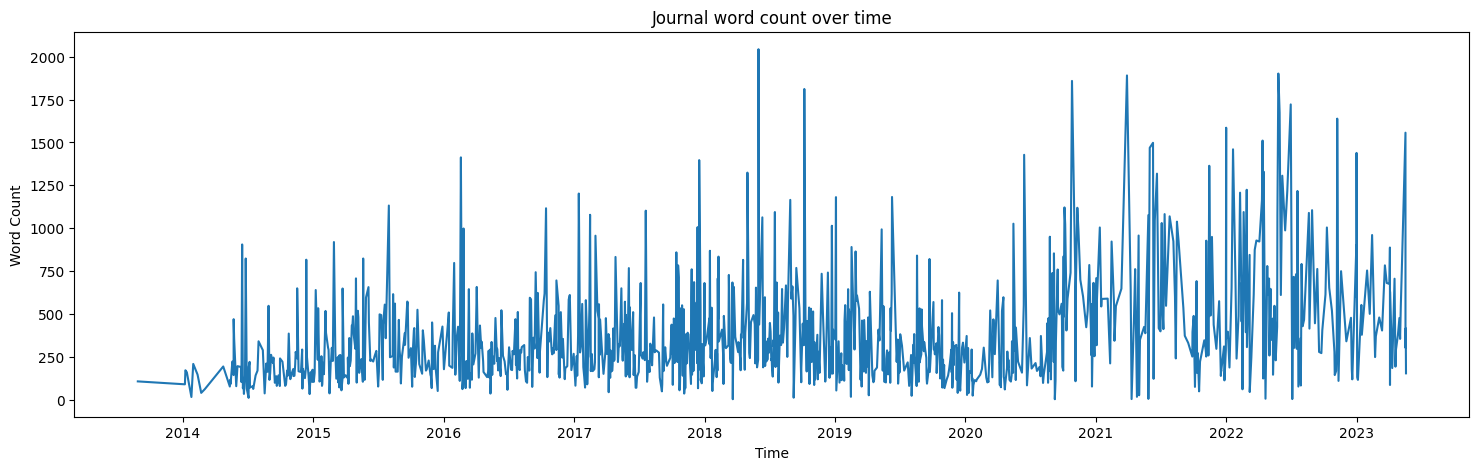

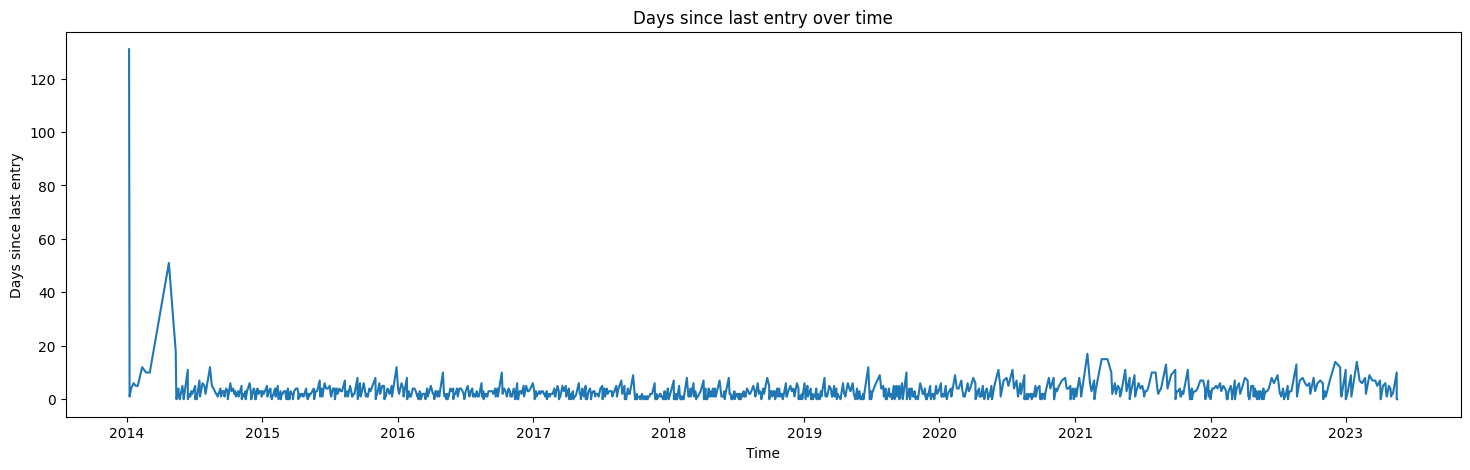

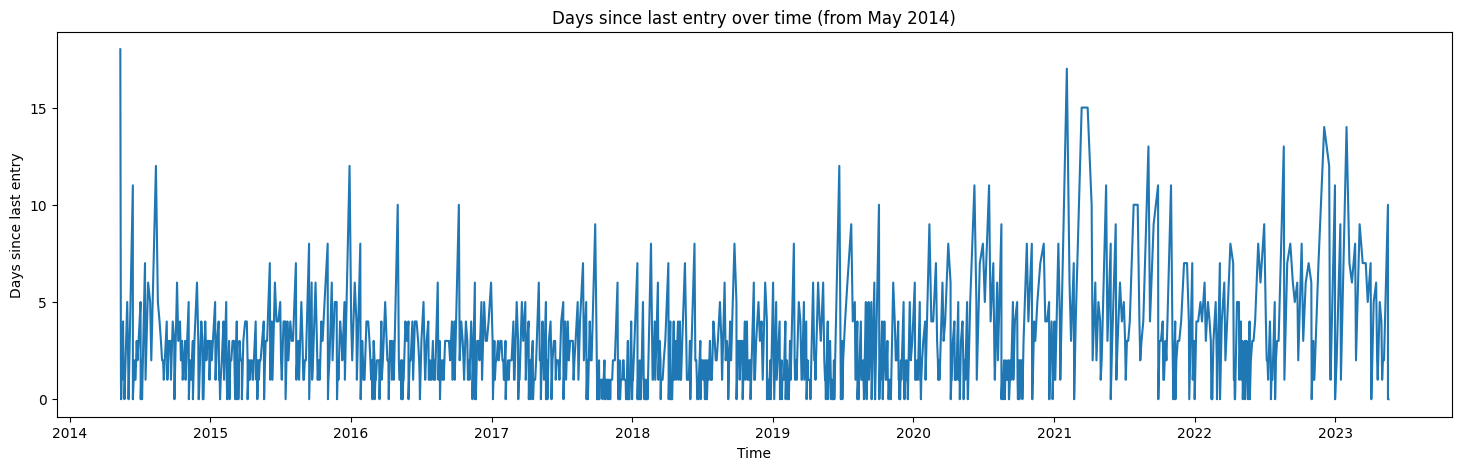

In [5]:
# Plot journal word count over time
fig_word_count, ax = plt.subplots(figsize=(18, 5))
ax = sns.lineplot(data=df, x=df.index, y='word_count')
ax.set(title='Journal word count over time', xlabel='Time', ylabel='Word Count')
fig_word_count.show()

# Plot journal word count over time 
fig_days_since_last_entry, ax = plt.subplots(figsize=(18, 5))
ax = sns.lineplot(data=df, x=df.index, y='days_since_last_entry')
ax.set(title='Days since last entry over time', xlabel='Time', ylabel='Days since last entry')
fig_days_since_last_entry.show()

df2 = df[df['date_time'] > '2014-05-01']
# Plot journal word count over time (since mid 2014)
fig_days_since_last_entry_since_mid_2014, ax = plt.subplots(figsize=(18, 5))
ax = sns.lineplot(data=df2, x=df2.index, y='days_since_last_entry')
ax.set(title='Days since last entry over time (from May 2014)', xlabel='Time', ylabel='Days since last entry')
ax.locator_params(axis="y", integer=True, tight=True)
fig_days_since_last_entry_since_mid_2014.show()

Plot distribution of word count, days since last entry

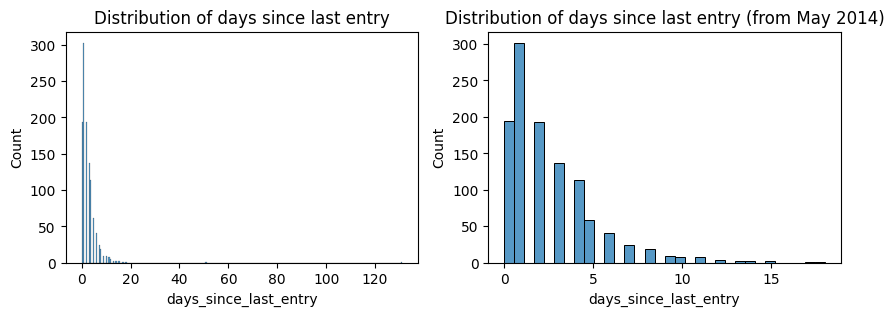

In [26]:
fig_word_count, axes = plt.subplots(1, 2, figsize=(10, 3))
#sns.histplot(ax = axes[0], data=df, x='word_count')
#axes[0].set_title(f'Distribution of word count')

sns.histplot(ax = axes[0], data=df, x='days_since_last_entry')
axes[0].set_title(f'Distribution of days since last entry')
axes[0].locator_params(axis="x", integer=True, tight=True)

sns.histplot(ax = axes[1], data=df2, x='days_since_last_entry')
axes[1].set_title(f'Distribution of days since last entry (from May 2014)')
axes[1].locator_params(axis="x", integer=True, tight=True)

Get sum and mean of word count by year

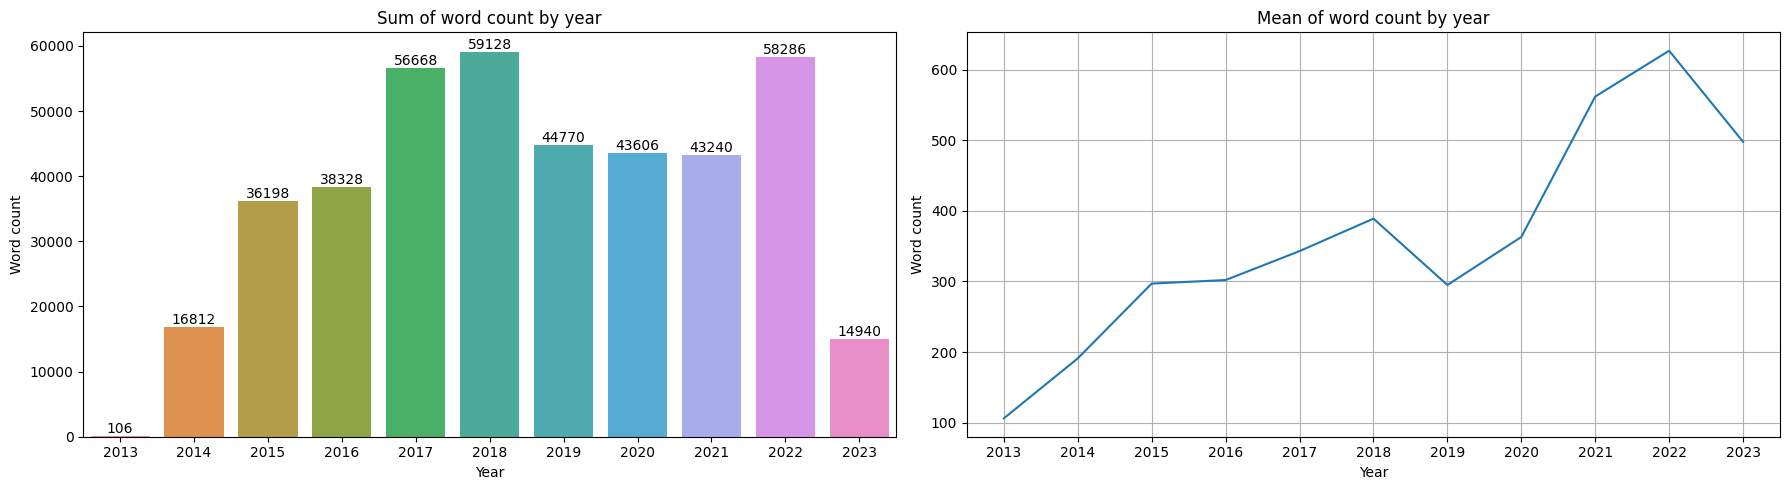

In [7]:
sum_wc_grp_yr = df.groupby(df['date_time'].dt.year)['word_count'].sum()
mean_wc_grp_yr = df.groupby(df['date_time'].dt.year)['word_count'].mean().round()
years_1 = [yr for yr in sum_wc_grp_yr.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(ax=axes[0], x=years_1, y=sum_wc_grp_yr)
axes[0].set(title='Sum of word count by year', xlabel='Year', ylabel='Word count')
axes[0].bar_label(axes[0].containers[0])


sns.lineplot(ax=axes[1], x=years_1, y=mean_wc_grp_yr)
axes[1].set(title='Mean of word count by year', xlabel='Year', ylabel='Word count')
axes[1].grid(visible=True, which='both')
# show all year ticks
axes[1].set_xticks((np.arange(min(years_1), max(years_1)+1, 1)))

fig.tight_layout()
fig.show()

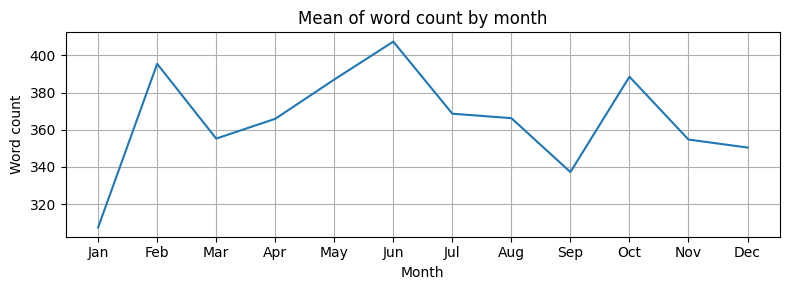

In [8]:
mean_wc_grp_mnth = df.groupby(df['date_time'].dt.month)['word_count'].mean()
months = [calendar.month_abbr[mnth_int] for mnth_int in mean_wc_grp_mnth.index]

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(x=months, y=mean_wc_grp_mnth)
ax.set(title='Mean of word count by month', xlabel='Month', ylabel='Word count')
plt.grid(visible=True, which='both')

fig.tight_layout()
fig.show()

Plot consistency (mean of 'days since last entry') by year and month

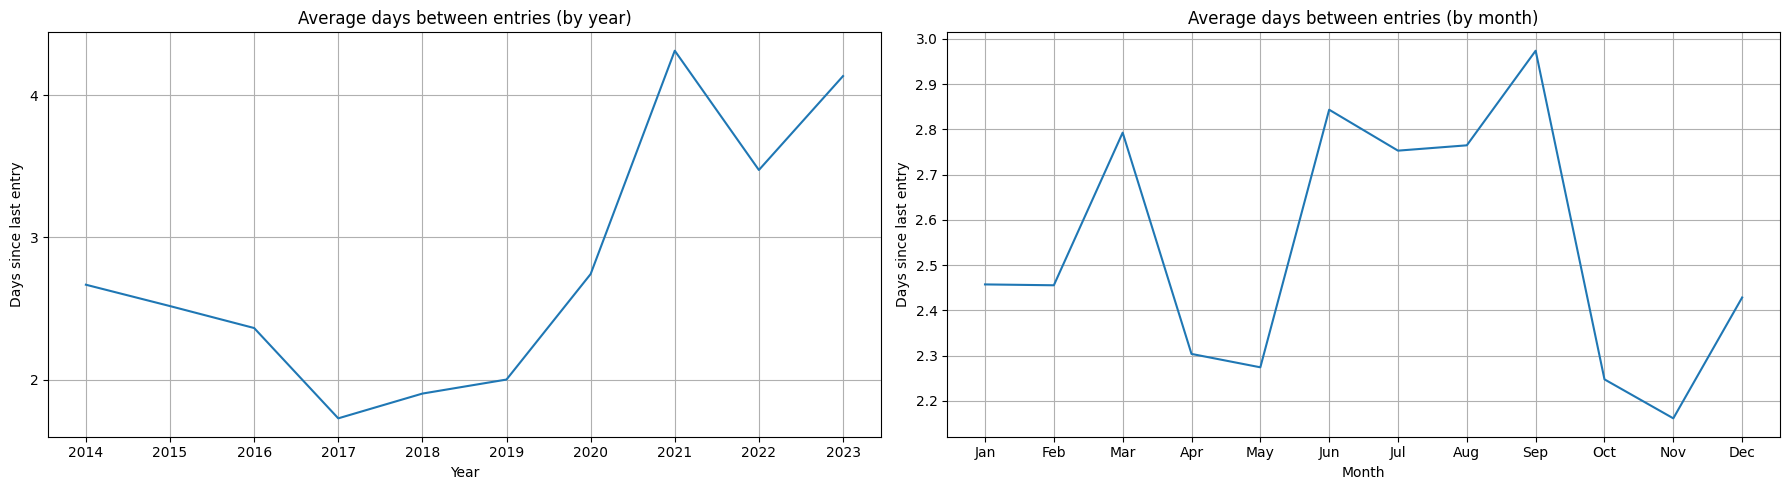

In [9]:
mean_consis_grp_yr = df.groupby(df2['date_time'].dt.year)['days_since_last_entry'].mean()
mean_consis_grp_mnth = df.groupby(df2['date_time'].dt.month)['days_since_last_entry'].mean()
years_2 = [yr for yr in mean_consis_grp_yr.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(ax=axes[0], x=years_2, y=mean_consis_grp_yr)
axes[0].set(title='Average days between entries (by year)', xlabel='Year', ylabel='Days since last entry')
axes[0].locator_params(axis="y", integer=True, tight=True)
axes[0].set_xticks((np.arange(min(years_2), max(years_2)+1, 1)))
axes[0].grid(visible=True, which='both')


sns.lineplot(ax=axes[1], x=months, y=mean_consis_grp_mnth)
axes[1].set(title='Average days between entries (by month)', xlabel='Month', ylabel='Days since last entry')
axes[1].grid(visible=True, which='both')

fig.tight_layout()
fig.show()

Plot number of entries  by year and month

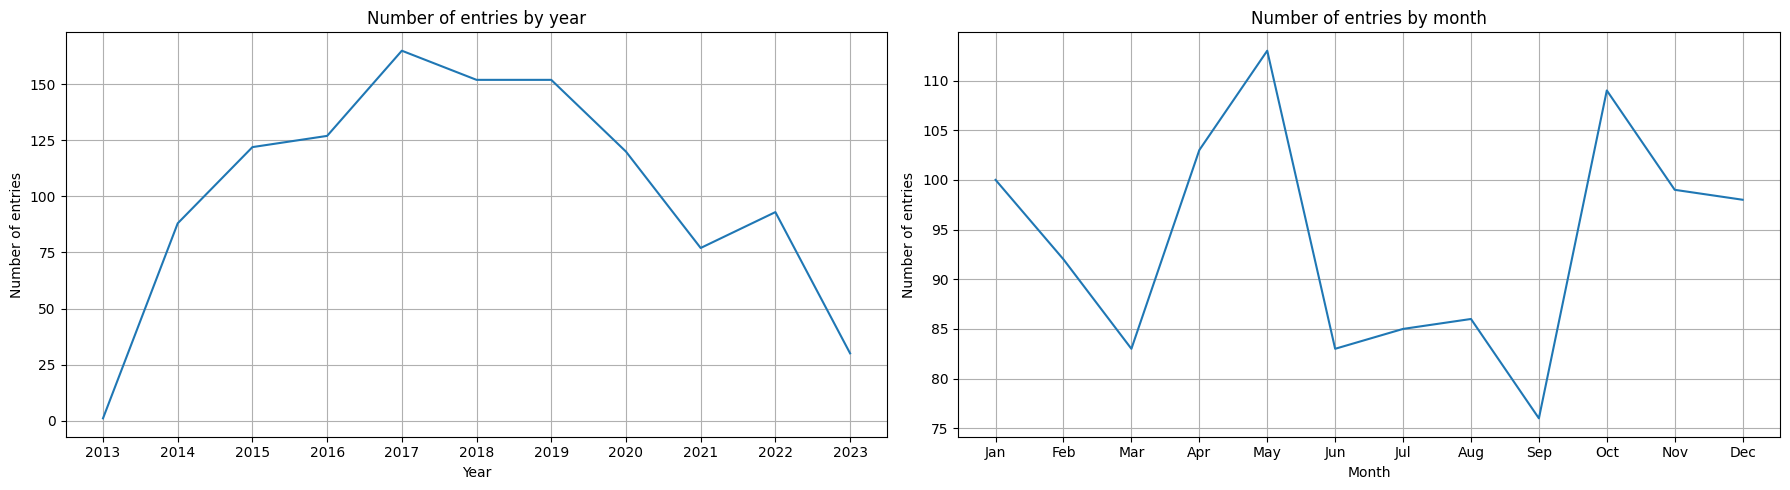

In [58]:
num_entry_grp_yr = df['year'].value_counts()
num_entry_grp_mnth = df.groupby(df['date_time'].dt.month)['month'].count()
years_3 = [yr for yr in num_entry_grp_yr.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(ax=axes[0], x=years_3, y=num_entry_grp_yr)
axes[0].set(title='Number of entries by year', xlabel='Year', ylabel='Number of entries')
axes[0].set_xticks((np.arange(min(years_3), max(years_3)+1, 1)))
axes[0].grid(visible=True, which='both')
#axes[0].bar_label(axes[0].containers[0])

sns.lineplot(ax=axes[1], x=months, y=num_entry_grp_mnth)
axes[1].set(title='Number of entries by month', xlabel='Month', ylabel='Number of entries')
axes[1].grid(visible=True, which='both')
#axes[1].bar_label(axes[1].containers[0])

fig.tight_layout()
fig.show()

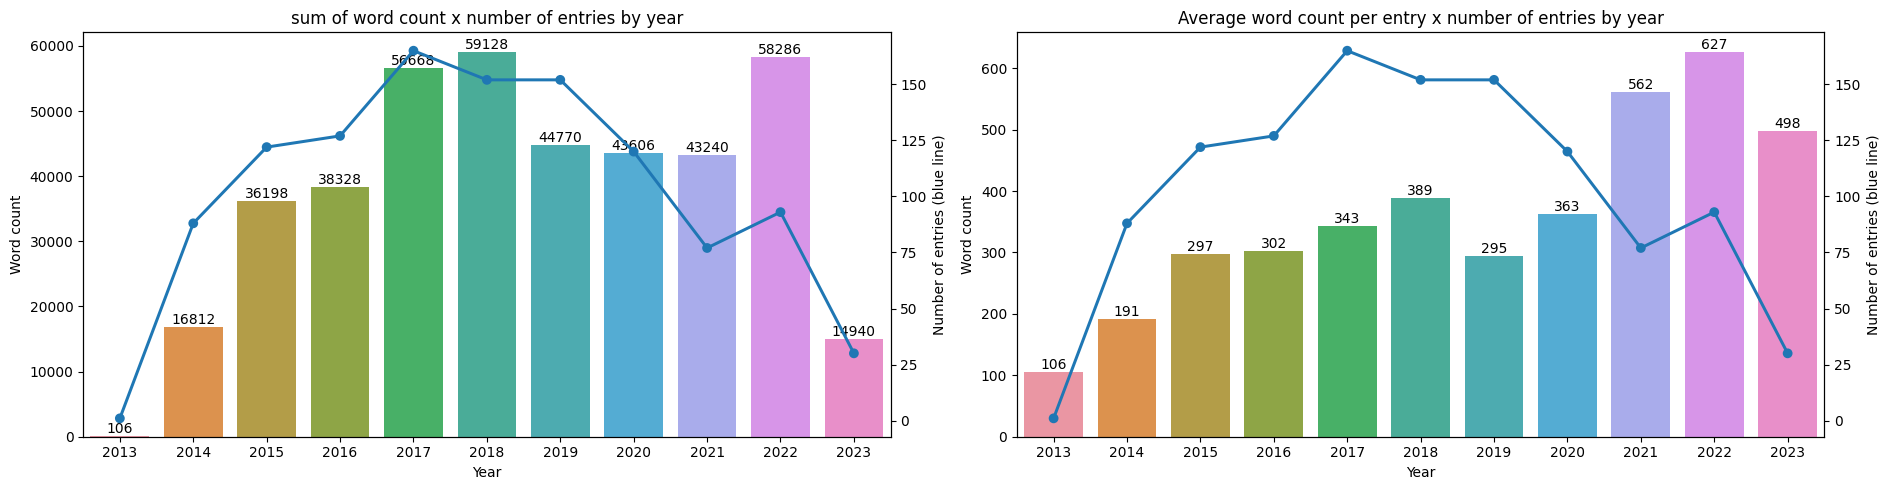

In [72]:
# Overlay number of entries a year to cumulative word count and mean word count
fig, axes = plt.subplots(1, 2, figsize=(19, 5))
ax0 = axes[0].twinx()
ax1 = axes[1].twinx()

# bar plot 1
sns.barplot(ax=axes[0], x=sum_wc_grp_yr.index, y=sum_wc_grp_yr)
axes[0].set(title='sum of word count x number of entries by year', xlabel='Year', ylabel='Word count')
axes[0].bar_label(axes[0].containers[0])

# line overlay plot 1
sns.pointplot(ax=ax0, x=years_3, y=num_entry_grp_yr, scale=0.8)
ax0.set(xlabel='Year', ylabel='Number of entries (blue line)')


# bar plot 2
sns.barplot(ax=axes[1], x=years_1, y=mean_wc_grp_yr)
axes[1].set(title='Average word count per entry x number of entries by year', xlabel='Year', ylabel='Word count')
axes[1].bar_label(axes[1].containers[0])

# line overlay plot 2
sns.pointplot(ax=ax1, x=years_3, y=num_entry_grp_yr, scale=0.8)
ax1.set(xlabel='Year', ylabel='Number of entries (blue line)')

fig.tight_layout()
fig.show()

Plot sentiment

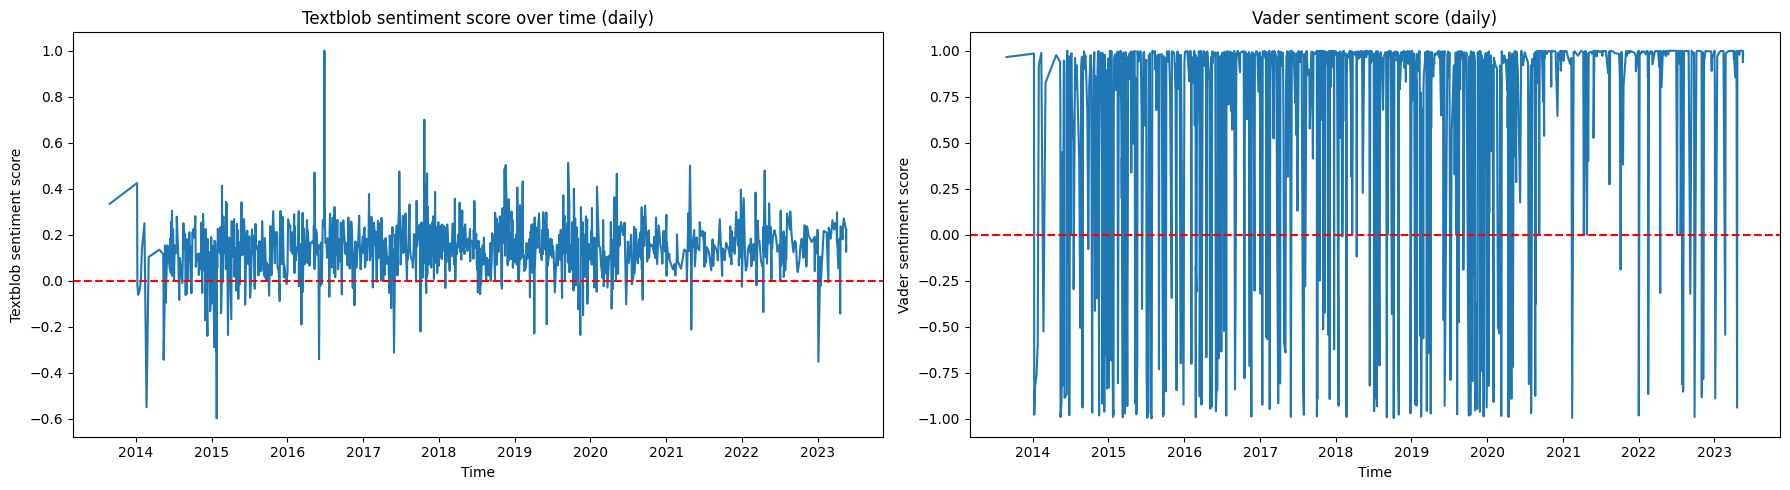

In [116]:
# Plot sentiment over time (daily)
figures, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot textblob
sns.lineplot(ax=axes[0], data=df, x=df.index, y='TB_senti')
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set(title='Textblob sentiment score over time (daily)', xlabel='Time', ylabel='Textblob sentiment score')

# plot vader
sns.lineplot(ax=axes[1], data=df, x=df.index, y='vader_senti')
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set(title='Vader sentiment score (daily)', xlabel='Time', ylabel='Vader sentiment score')

figures.tight_layout()
figures.show()

Plot sentiment resample timeseries by month

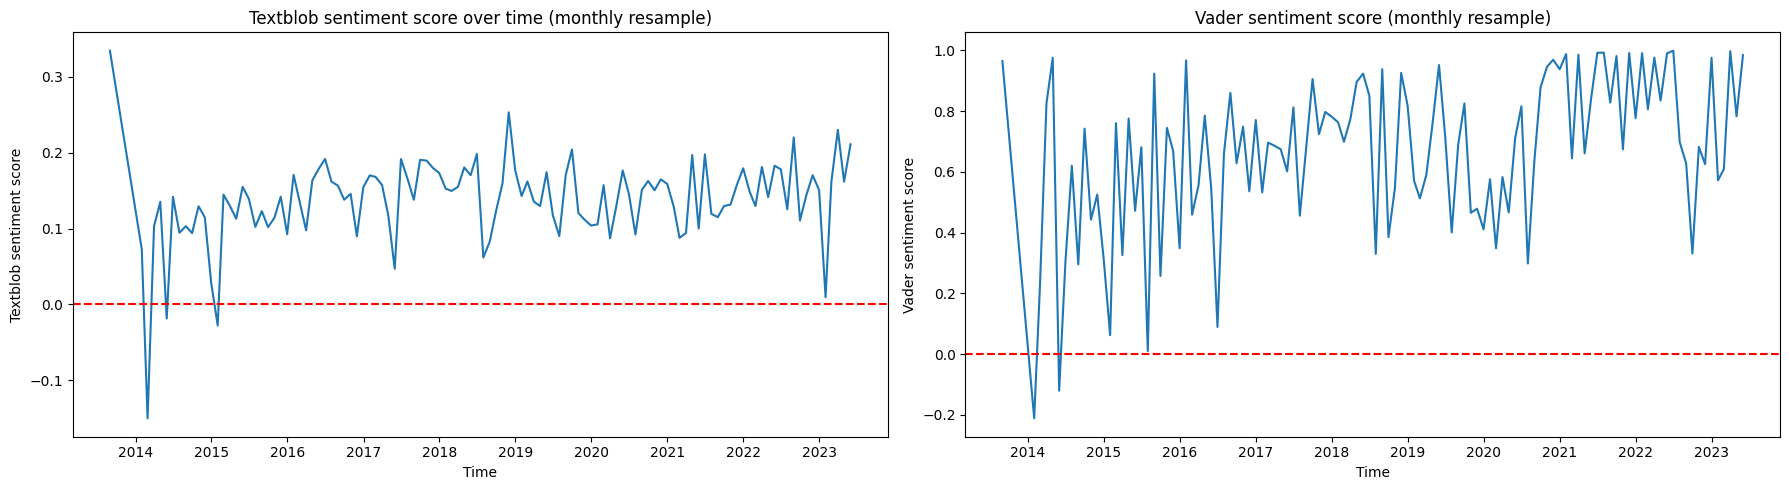

In [115]:
# resample the data to monthly frequency, aggregating with mean for TEXTBLOB and Vader sentiment
senti_grp_yr_mnth = df[['TB_senti', 'vader_senti']].resample('M').mean().dropna()

# Plot monthly 
figures, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot textblob
sns.lineplot(ax=axes[0], data=senti_grp_yr_mnth['TB_senti'])
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set(title='Textblob sentiment score over time (monthly resample)', xlabel='Time', ylabel='Textblob sentiment score')

# plot vader
sns.lineplot(ax=axes[1], data=senti_grp_yr_mnth['vader_senti'])
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set(title='Vader sentiment score (monthly resample)', xlabel='Time', ylabel='Vader sentiment score')

figures.tight_layout()
figures.show()

Group by month

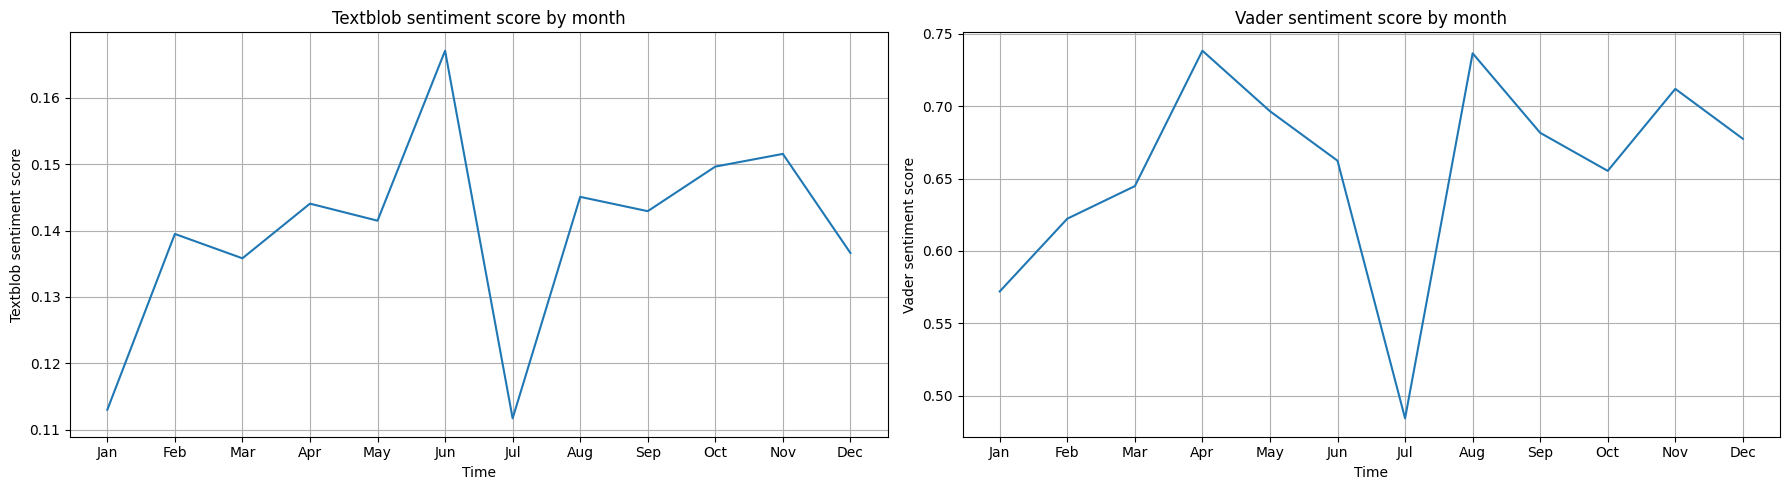

In [124]:
# resample the data to monthly frequency, aggregating with mean for TEXTBLOB and Vader sentiment
tb_senti_mnth = df.groupby(df['date_time'].dt.month)['TB_senti'].mean()
vader_senti_mnth = df.groupby(df['date_time'].dt.month)['vader_senti'].mean()
months = [calendar.month_abbr[mnth_int] for mnth_int in mean_wc_grp_mnth.index]


# Plot monthly 
figures, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot textblob
sns.lineplot(ax=axes[0], x=months, y=tb_senti_mnth)
#axes[0].axhline(0, color='r', linestyle='--')
axes[0].set(title='Textblob sentiment score by month', xlabel='Time', ylabel='Textblob sentiment score')
axes[0].grid(visible=True, which='both')


# plot vader
sns.lineplot(ax=axes[1], x=months, y=vader_senti_mnth,)
#axes[1].axhline(0, color='r', linestyle='--')
axes[1].set(title='Vader sentiment score by month', xlabel='Time', ylabel='Vader sentiment score')
axes[1].grid(visible=True, which='both')


figures.tight_layout()
figures.show()

#### <span style='color:LightGreen'> **Ex2: Visualise a histogram and scatterplot for the 3 variables**</span>

<ul style='color:LightGreen'>
  <li>Word count</li>
  <li>textblob sentiment</li>
  <li>Vader sentiment</li>
</ul>

Plot histogram

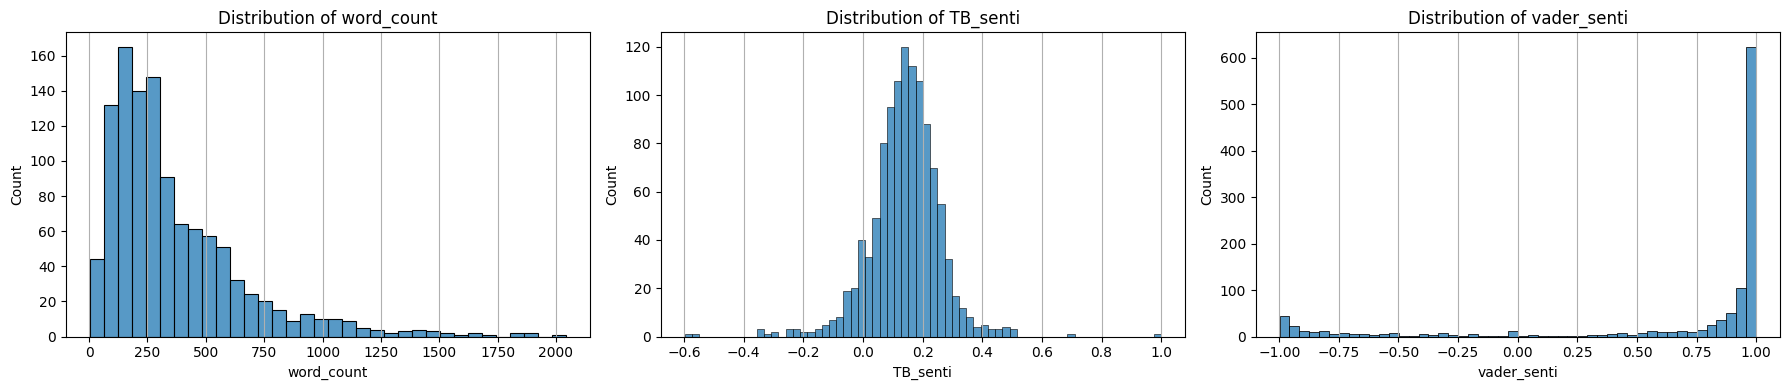

In [95]:
fig_histograms, axes = plt.subplots(1, 3, figsize=(18, 4))

col_names = ['word_count', 'TB_senti', 'vader_senti']

for i in range(3):
  # select column name using the index
  column_name = col_names[i] 
  # select the data column (on non null values)
  data_to_use = df[column_name]
  sns.histplot(ax=axes[i], data=data_to_use)
  axes[i].set_title(f'Distribution of {col_names[i]}')
  axes[i].grid(visible=True, which='both', axis='x')

fig_histograms.tight_layout()

Plot scatterplots

In [15]:
relationships = ['TB_senti & vader_senti', 'TB_senti & word_count', 'vader_senti & word_count']

# define a function that splits the input text then returns the name of var 1 and var 2
def get_names_var1_and_var2(input_txt):
  return input_txt.split(' & ')[0], input_txt.split(' & ')[1]

In [16]:
# Normalise DF
normalised_df = pd.DataFrame({
  'word_count' : df['word_count'],
  'TB_senti' : df['TB_senti'],
  'vader_senti': df['vader_senti']
})

# scale
#scale_norm = MinMaxScaler()
#scale_norm.fit_transform(normalised_df)
#normalised_df = pd.DataFrame(scale_norm.fit_transform(normalised_df), columns = normalised_df.columns)

# Create a correlation matrix (to get r score)
correlation_matrix = normalised_df.corr()

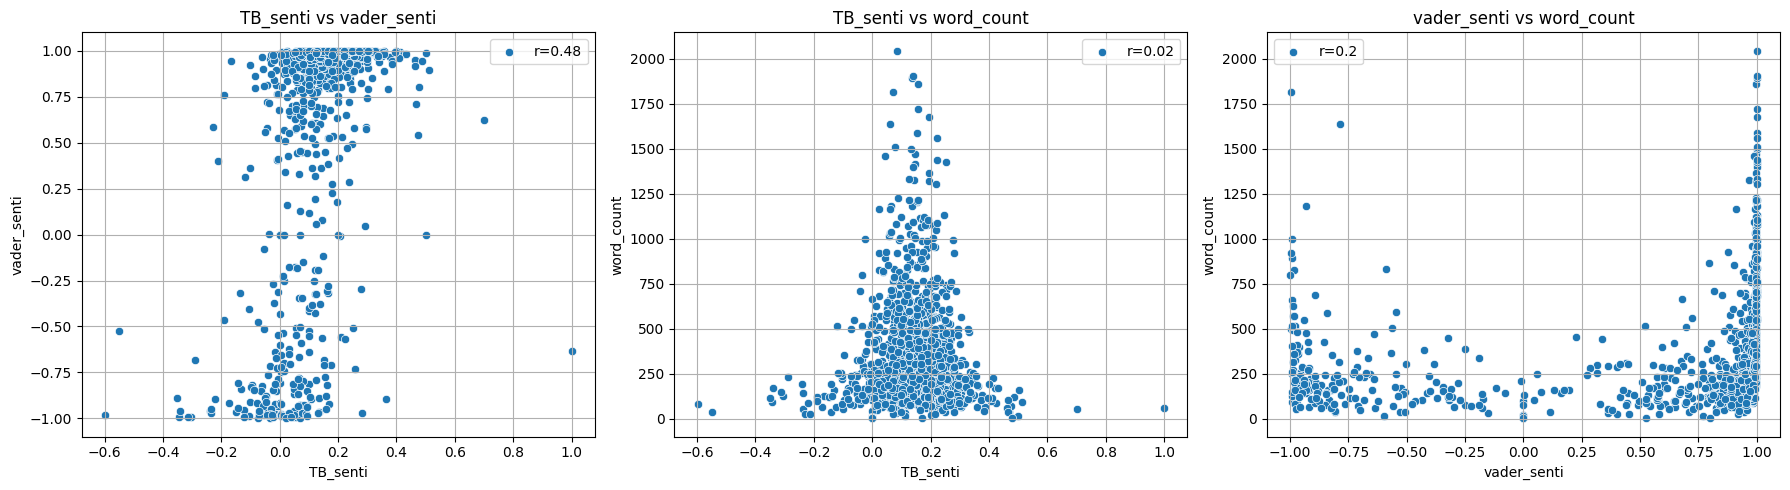

In [17]:
# Plot charts
fig_scatter, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(len(relationships)):
  var1_name, var2_name = get_names_var1_and_var2(relationships[i])
  
  # get Pearson Correlation Coefficient
  r_val = correlation_matrix.loc[var1_name, var2_name]
  
  sns.scatterplot(ax=axes[i], data=normalised_df, x=var1_name, y=var2_name)
  axes[i].set_title(f'{var1_name} vs {var2_name}')
  axes[i].grid(visible=True, which='both')
  axes[i].legend([f'r={round(r_val, 2)}'])

fig_scatter.tight_layout()

#### <span style='color:LightGreen'> **Ex3: Create the dataframe for cumulative word count for each day of the year (split by year)**</span>  
-For bar race animation (using SJ visualiser)  
-For ploting all years' word count over time on 1 chart

In [18]:
# copy the dataframe
pivot_df = df.copy()

# convert date time to a new column 'date_time'
pivot_df['day_of_year'] = pd.to_datetime(pivot_df['date_time']).dt.dayofyear

# Pivot the dataframe to a wide-form representation
df_wide = pivot_df.pivot_table(values='word_count', index='day_of_year', columns='year', aggfunc= 'sum')

# create a series to hold all days of year
all_days_in_yr_series = pd.Series([i for i in range(1, 366)])

# reindex the wide dataframe
df_wide = df_wide.reindex(index=all_days_in_yr_series)

# fill NaN values with zeroes. Convert df to int
df_wide = df_wide.fillna(0).astype('int')

# Get cumulative sum for each row
df_wide = df_wide.cumsum()

# change names of columns
nw_col_names = [f'yr_'+str(yr) for yr in df_wide.columns.to_list()]
df_wide.columns = nw_col_names

# insert days as a new column
df_wide.insert(0, 'day', df_wide.index, False)

In [19]:
# save dataframe as excel file
#df_wide.to_excel("word_count_bar_race.xlsx", index=False)

#### <span style='color:LightGreen'> **Ex4: Plot word count over time (1 year) for all years**</span>  

In [20]:
df_wide

,day,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018,yr_2019,yr_2020,yr_2021,yr_2022,yr_2023
1,1,0,0,0,0,0,319,351,0,708,0,0
2,2,0,0,103,177,0,635,351,0,1025,0,131
3,3,0,0,103,177,118,635,1532,0,1609,0,131
4,4,0,0,259,415,199,635,1585,371,1609,0,246
5,5,0,0,259,415,199,635,1585,398,1609,396,246
...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,106,16535,35772,38061,55314,59128,44554,43031,41007,55347,14940
362,362,106,16638,36198,38061,55314,59128,44554,43606,41007,55347,14940
363,363,106,16812,36198,38061,55449,59128,44770,43606,41007,55347,14940
364,364,106,16812,36198,38061,55988,59128,44770,43606,41296,55347,14940


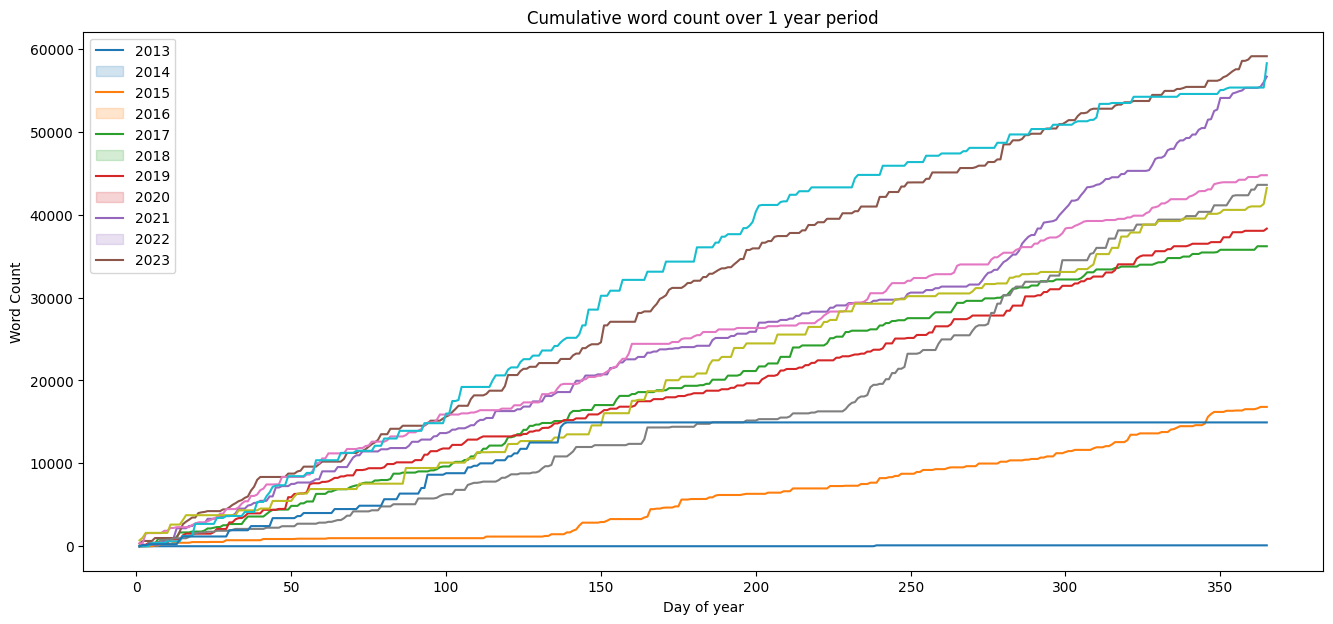

In [21]:
fig, ax = plt.subplots(figsize=(16, 7))
labels = []
# loop over the column names, skip 1st col
for yr in df_wide.columns.to_list()[1:]:
  ax = sns.lineplot(x='day', y=yr, data=df_wide)
  labels.append(yr.replace('yr_', ''))

ax.set(title='Cumulative word count over 1 year period', xlabel='Day of year', ylabel='Word Count')
ax.legend(labels)